**IMPORT LIBRARIES**

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

**MOUNT GOOGLE DRIVE**

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**CHANGE THE CURRENT WORKING DIRECTORY**

In [31]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Training Letters/")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Training Letters'

**LOAD AND DISPLAY A IMAGE FROM A SPECIFIED PATH**

In [32]:
img = image.load_img("Training/K/1.jpeg")

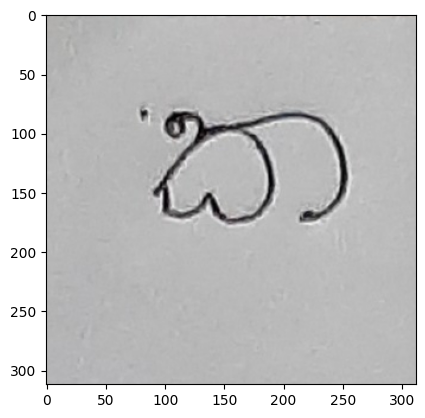

In [33]:
plt.imshow(img)

**Read the image using OpenCV (cv2) and retrieve its shape bold text**

In [34]:
cv2.imread("Training/K/1.jpeg").shape

(312, 312, 3)

**Create an ImageDataGenerator for training data and validation data with pixel value rescaling**

In [35]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

**Create a training dataset and validation dataset generator using the training ImageDataGenerator**

In [36]:
train_dataset = train.flow_from_directory('Training/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('Validation/',
                                                   target_size = (200,200),
                                                   batch_size = 3,
                                                   class_mode = 'binary')

Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


**Retrieve the mapping of class names to their indices in the training dataset**

In [37]:

train_dataset.class_indices

{'J': 0, 'K': 1}

**Retrieve the array of class indices for each sample in the training dataset**

In [38]:

train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Create a Sequential model**

In [39]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

**Compile the model with binary crossentropy loss, RMSprop optimizer, and accuracy metric**

In [40]:

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

**Train the model using the training dataset and validate on the validation dataset**

In [41]:

model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 5s 839ms/step - loss: 3.2784 - accuracy: 0.6000 - val_loss: 0.8129 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 0.7369 - accuracy: 0.3333 - val_loss: 0.6894 - val_accuracy: 0.5250
Epoch 3/30
5/5 [==============================] - 4s 782ms/step - loss: 0.7221 - accuracy: 0.2667 - val_loss: 0.6832 - val_accuracy: 0.5500
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 1.1788 - accuracy: 0.6667 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 4s 793ms/step - loss: 0.6997 - accuracy: 0.4667 - val_loss: 0.7329 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 5s 1s/step - loss: 0.7052 - accuracy: 0.5333 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 4s 825ms/step - loss: 0.7111 - accuracy: 0.6000 - val_loss: 0.6587 - val_accuracy: 0.5000
Epoch 8/30
5/5 [=============

In [24]:
validation_dataset.class_indices

{'J': 0, 'K': 1}

In [28]:
dir_path = 'Testing/'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+ i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print("This is Letter 'ජ' in Sinhala")
  else:
    print("This is Letter 'ක' in Sinhala")

Output hidden; open in https://colab.research.google.com to view.